In [1]:
import requests

In [2]:
url = "https://www.starbucks.co.kr/store/getStore.do?"

In [3]:
head = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36"}

In [4]:
payload = {"in_biz_cds" : "0",
        "in_scodes" : "0",
        "ins_lat" : "37.5001823",
        "ins_lng" : "127.0078127",
        "search_text" : "",
        "p_sido_cd" : "01",
        "p_gugun_cd" : "",
        "in_distance" : "0",
        "in_biz_cd" : "",
        "isError" : "true",
        "searchType" : "C",
        "set_date" : "",
        "all_store" : "0",
        "T03" : "0",
        "T01" : "0",
        "T27" : "0",
        "T12" : "0",
        "T09" : "0",
        "T30" : "0",
        "T05" : "0",
        "T22" : "0",
        "T21" : "0",
        "T10" : "0",
        "T36" : "0",
        "T43" : "0",
        "T48" : "0",
        "P10" : "0",
        "P50" : "0",
        "P20" : "0",
        "P60" : "0",
        "P30" : "0",
        "P70" : "0",
        "P40" : "0",
        "P80" : "0",
        "whcroad_yn" : "0",
        "P90" : "0",
        "new_bool" : "0",
        "iend" : "1000",
        "rndCod" : "KSBBBU69W9"}

In [5]:
r = requests.post(url, headers=head, data=payload)

In [6]:
r.json()['list'].__len__()

566

In [7]:
import pandas as pd

In [8]:
seoul_star = pd.DataFrame(r.json()['list'])

In [9]:
for x in seoul_star.iloc[0, :]:
    print (x, end=", ")

0, None, None, None, None, None, None, None, None, None, None, None, 0, None, , , None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1509, 역삼아레나빌딩, 1522-3232, 02-568-3763, 01, 서울, 0101, 강남구, 서울특별시 강남구 역삼동 721-13 아레나빌딩, None, None, T05@T08@T16@T17@T20@T21@T30@T36@T52@P80@P90, 0, , , , 0, 3.11, -1, -1, -1, 30, , 0, 3762, N, , 0, None, None, /upload/store/2020/09/[3762]_20200917031519_6juwr.JPG, None, None, None, None, None, 0, None, None, 0, None, None, None, None, None, None, , 1, 60, 20190613, 0, , , , , , 서울특별시 강남구 언주로 425 (역삼동), , N, WHCROAD, , , , 0, None, A01, None, None, 37.501087, 127.043069, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [10]:
seoul_star.columns

Index(['seq', 'sido_cd', 'sido_nm', 'gugun_cd', 'gugun_nm', 'code_order',
       'view_yn', 'store_num', 'sido', 'gugun',
       ...
       't22', 't21', 'p90', 't05', 't30', 't36', 't27', 't29', 't43', 't48'],
      dtype='object', length=129)

In [11]:
seoul_star.isnull().sum()

seq           0
sido_cd     566
sido_nm     566
gugun_cd    566
gugun_nm    566
           ... 
t36           0
t27           0
t29           0
t43           0
t48           0
Length: 129, dtype: int64

In [12]:
seoul_star.dropna(axis=1, inplace=True)

In [13]:
seoul_star.head(1)

,seq,p_pro_seq,p_sido_cd,p_gugun_cd,s_code,s_name,tel,fax,sido_code,sido_name,...,t22,t21,p90,t05,t30,t36,t27,t29,t43,t48
0,0,0,,,1509,역삼아레나빌딩,1522-3232,02-568-3763,01,서울,...,0,0,0,0,0,0,0,0,0,0


In [14]:
import numpy as np
seoul_star.replace(0, np.NAN, inplace=True)
seoul_star.replace("", np.NAN, inplace=True)
seoul_star.dropna(axis=1, inplace=True)

In [15]:
seoul_star.head(1)

,s_code,s_name,tel,fax,sido_code,sido_name,gugun_code,gugun_name,addr,theme_state,...,new_icon,defaultimage,istart,iend,open_dt,doro_address,my_siren_order_store_yn,store_area_code,lat,lot
0,1509,역삼아레나빌딩,1522-3232,02-568-3763,01,서울,0101,강남구,서울특별시 강남구 역삼동 721-13 아레나빌딩,T05@T08@T16@T17@T20@T21@T30@T36@T52@P80@P90,...,N,/upload/store/2020/09/[3762]_20200917031519_6j...,1,60,20190613,서울특별시 강남구 언주로 425 (역삼동),N,A01,37.501087,127.043069


* where 조건 사용 참고사항

In [16]:
a = seoul_star.where(seoul_star != "", None)

In [17]:
a.dropna(axis=1, inplace=True)

In [18]:
# s_name, gugun_name, addr, defaultimage, doro_address, open_dt, lat, lon                                                             
seoul_star.iloc[0,:]


s_code                                                                  1509
s_name                                                               역삼아레나빌딩
tel                                                                1522-3232
fax                                                              02-568-3763
sido_code                                                                 01
sido_name                                                                 서울
gugun_code                                                              0101
gugun_name                                                               강남구
addr                                              서울특별시 강남구 역삼동 721-13 아레나빌딩
theme_state                      T05@T08@T16@T17@T20@T21@T30@T36@T52@P80@P90
out_distance                                                            3.11
all_search_cnt                                                            -1
addr_search_cnt                                                           -1

In [19]:
target_col = ["s_name","gugun_name","addr","defaultimage","doro_address","open_dt","lat","lot",]

In [20]:
seoul_star =seoul_star[target_col]

In [21]:
# 가장 오래된 스타벅스, 가장 최근에 오픈한 스타벅스, 스타벅스 오픈 월별 추이 
seoul_star

,s_name,gugun_name,addr,defaultimage,doro_address,open_dt,lat,lot
0,역삼아레나빌딩,강남구,서울특별시 강남구 역삼동 721-13 아레나빌딩,/upload/store/2020/09/[3762]_20200917031519_6j...,서울특별시 강남구 언주로 425 (역삼동),20190613,37.501087,127.043069
1,논현역사거리,강남구,서울특별시 강남구 논현동 142-2 정일빌딩,/upload/store/2018/12/[3672]_20181211120009_t9...,서울특별시 강남구 강남대로 538 (논현동),20181123,37.510178,127.022223
2,신사역성일빌딩,강남구,서울특별시 강남구 논현동 18-4 성일빌딩,/upload/store/2019/12/[3858]_20191218124337_c8...,서울특별시 강남구 강남대로 584 (논현동),20191219,37.514132,127.020563
3,국기원사거리,강남구,서울특별시 강남구 역삼동 648-22 동찬빌딩,/upload/store/2019/07/[3669]_20190730073527_5n...,서울특별시 강남구 테헤란로 125 (역삼동),20190731,37.499517,127.031495
4,스탈릿대치R,강남구,서울특별시 강남구 대치동 599 대원빌딩,/upload/store/2019/02/[3703]_20190215093408_m3...,서울특별시 강남구 남부순환로 2947 (대치동),20190214,37.494668,127.062583
...,...,...,...,...,...,...,...,...
561,사가정역,중랑구,서울특별시 중랑구 면목동 617-2,/upload/store/2015/07/[3023]_20150730100354230...,서울특별시 중랑구 면목로 310,20141002,37.579594,127.087966
562,상봉역,중랑구,"서울특별시 중랑구 상봉동 100-2,3,4번지",/upload/store/2019/10/[9686]_20191001110003_28...,서울특별시 중랑구 망우로 307 (상봉동),20120323,37.59689,127.08647
563,묵동이마트,중랑구,서울특별시 중랑구 묵동 170-1 묵동자이아파트 (묵동이마트 B1층),/upload/store/2019/01/[9570]_20190110064916_t8...,"서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)",20110121,37.613433,127.077484
564,묵동,중랑구,서울특별시 중랑구 묵동 169-12 1층,/upload/store/2020/06/[3936]_20200628090702_8k...,서울특별시 중랑구 동일로 952,20200630,37.615368,127.076633


In [22]:
print(seoul_star.sort_values('open_dt').iloc[-1])

s_name                                                     수서역사거리
gugun_name                                                    강남구
addr                                   서울특별시 강남구 수서동 724 로즈데일오피스텔
defaultimage    /upload/store/2021/09/[4153]_20210929104219_e5...
doro_address                              서울특별시 강남구 광평로 280 (수서동)
open_dt                                                  20210929
lat                                              37.4873267937748
lot                                              127.103140081887
Name: 78, dtype: object


In [23]:
tmp = seoul_star.sort_values("open_dt")
tmp

,s_name,gugun_name,addr,defaultimage,doro_address,open_dt,lat,lot
222,이대R,서대문구,서울특별시 서대문구 대현동 54-4,/upload/store/2019/07/[9100]_20190724082658_ax...,서울특별시 서대문구 이화여대길 34 (대현동),19990727,37.55848315,126.9459643
368,여의도,영등포구,서울특별시 영등포구 여의도동 23-9,/upload/store/2021/06/[9160]_20210603042849_0k...,서울특별시 영등포구 국제금융로2길 28 (여의도동),20001009,37.52403519,126.9245179
48,압구정역,강남구,서울특별시 강남구 신사동 580-2 관영빌딩 1층 지하1층,/upload/store/2020/07/[9213]_20200703054403_kh...,"서울특별시 강남구 압구정로 170, 관영빌딩 1층 지하1층 (신사동)",20010310,37.52674095,127.0281105
532,한양대,성동구,"서울특별시 성동구 행당동 31-11 경희빌딩 1,2층",/upload/store/2017/07/[9215]_20170730042059_m3...,"서울특별시 성동구 왕십리로 225 (행당동) 1,2층",20010420,37.55726984,127.0421649
410,인사,종로구,서울특별시 종로구 인사동 39,/upload/store/2018/06/[9222]_20180615020701_pl...,서울특별시 종로구 인사동길 14 (인사동),20010810,37.5721293,126.98703490000002
...,...,...,...,...,...,...,...,...
535,옥수,성동구,서울특별시 성동구 옥수동 262-1,/upload/store/2021/09/[4136]_20210901053042_ky...,서울특별시 성동구 독서당로 202 (옥수동),20210902,37.5430298,127.0133661
514,구로고척,구로구,서울특별시 구로구 고척동 72-59 외 6필지,/upload/store/2021/09/[3994]_20210914024946_ei...,서울특별시 구로구 경인로 387 (고척동),20210909,37.49706,126.86315
326,송파KT,송파구,"서울특별시 송파구 신천동 29-1, 오피스빌딩 1층 2~4호",/upload/store/2021/09/[4139]_20210910080523_j4...,"서울특별시 송파구 잠실로 209 (신천동), 오피스빌딩 1층 2~4호",20210910,37.5139991,127.1063026
111,강서NC,강서구,"서울특별시 강서구 등촌동 689 엔씨백화점 1F, 일부",/upload/store/2021/09/[4122]_20210913032029_pw...,서울특별시 강서구 강서로56길 17 (등촌동),20210915,37.560088,126.840534


In [24]:
tmp["open_dt"] = pd.to_datetime(tmp["open_dt"])

In [25]:
tmp["open_year"] = tmp["open_dt"].dt.strftime("%Y")
tmp["open_month"] = tmp["open_dt"].dt.strftime("%m")
tmp2 = tmp.groupby(["open_year", "open_month"])[['s_name']].count()

<AxesSubplot:xlabel='open_year,open_month'>

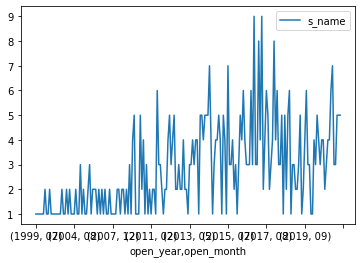

In [26]:
tmp2.plot()

* T03 -> 리저브 체크 
* T01 -> DT 

In [27]:
payload['T03'] = 0
payload['T01'] = 1

In [28]:
r2 = requests.post(url, headers=head, data=payload)

In [29]:
pd.DataFrame(r2.json()['list'])[target_col].shape

(17, 8)

In [30]:
tmp.iloc[0,3]

'/upload/store/2019/07/[9100]_20190724082658_ax4i8.JPG'

## starbucks_images 폴더 생성 후 사진 저장 
* 폴더가 존재하면 skip... 없다면 생성
## 사진 저장 이름 : 매장이름.jpg

In [31]:
tmp['defaultimage'] = 'https://www.starbucks.co.kr' + tmp['defaultimage']

In [32]:
for i in tmp['defaultimage'].values[:1]:
    img_res = requests.get(i)
        
    with open(f"""{i[-5:]}.jpg""", "wb") as f:
        f.write(img_res.content)


In [33]:
tmp.loc[222, "defaultimage"]

'https://www.starbucks.co.kr/upload/store/2019/07/[9100]_20190724082658_ax4i8.JPG'

In [34]:
i[:-4]

'https://www.starbucks.co.kr/upload/store/2019/07/[9100]_20190724082658_ax4i8'